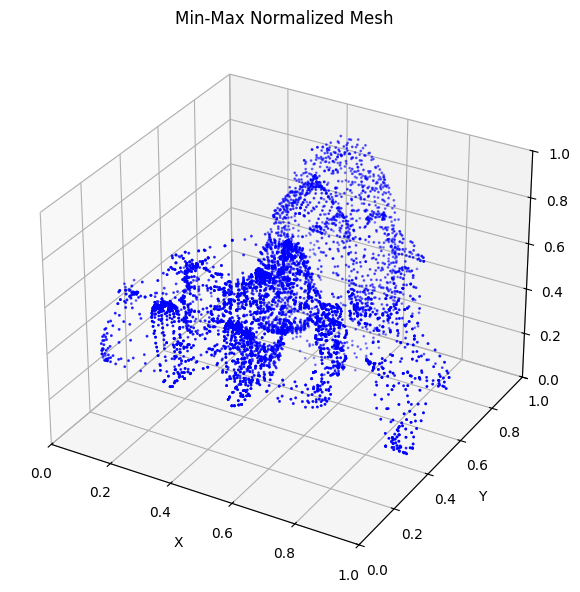

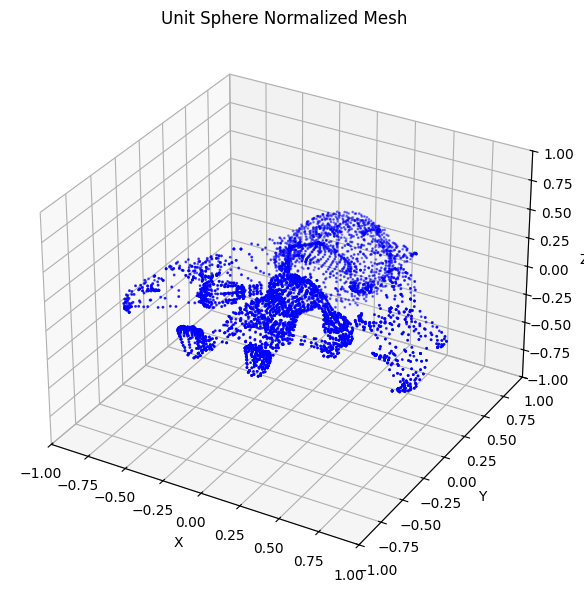

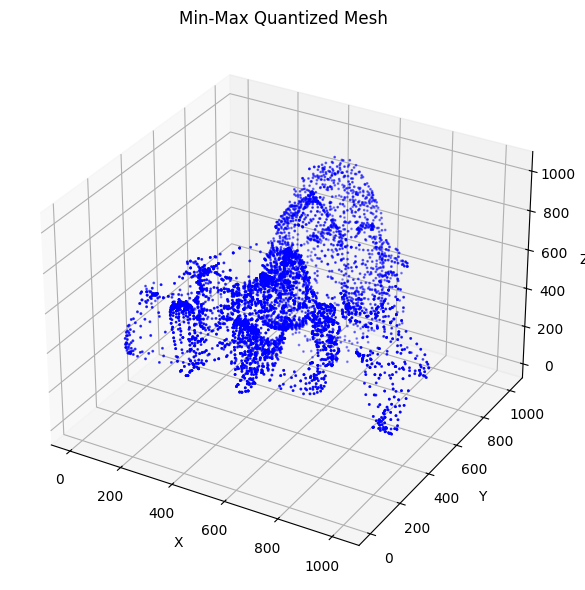

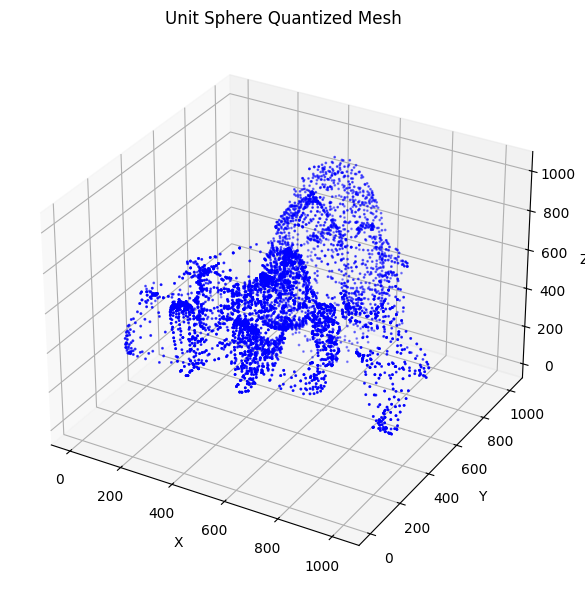

In [44]:
import trimesh
import numpy as np
import matplotlib.pyplot as plt

# load mesh
mesh = trimesh.load("/content/meshes/Meshes/girl.obj")
v = mesh.vertices.copy()

# min-max normalization
def minmax(v):
    return (v - v.min(0)) / (v.max(0) - v.min(0))

# unit sphere normalization
def unit(v):
    c = v.mean(0)
    v = v - c
    return v / np.linalg.norm(v, axis=1).max()

# quantization
def quant(v, bins=1024):
    v = (v - v.min(0)) / (v.max(0) - v.min(0)) * (bins - 1)
    return np.round(v).astype(np.int32)

# apply
v_mm = minmax(v)
v_unit = unit(v)
v_mm_q = quant(v_mm)
v_unit_q = quant(v_unit)

# plot 1: Min-Max Normalized
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(v_mm[:,0], v_mm[:,1], v_mm[:,2], s=1, c='blue')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Min-Max Normalized Mesh")
plt.tight_layout()
plt.show()

# plot 2: Unit Sphere Normalized
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(v_unit[:,0], v_unit[:,1], v_unit[:,2], s=1, c='blue')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Unit Sphere Normalized Mesh")
plt.tight_layout()
plt.show()

# plot 3: Min-Max Quantized
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(v_mm_q[:,0], v_mm_q[:,1], v_mm_q[:,2], s=1, c='blue')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Min-Max Quantized Mesh")
plt.tight_layout()
plt.show()

# plot 4: Unit Sphere Quantized
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(v_unit_q[:,0], v_unit_q[:,1], v_unit_q[:,2], s=1, c='blue')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Unit Sphere Quantized Mesh")
plt.tight_layout()
plt.show()
